Adult income dataset

In [1]:
import pandas as pd

df = pd.read_csv('/content/Adult income dataset.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Information:")
df.info()

First 5 rows of the DataFrame:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hour

Identifying categorical and numerical features.

In [2]:
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

ordinal_features = ['education', 'income']
nominal_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Ordinal Features:", ordinal_features)
print("Nominal Features:", nominal_features)

Numerical Features: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical Features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
Ordinal Features: ['education', 'income']
Nominal Features: ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


Applying Label Encoding where order exists

In [3]:
df_encoded = df.copy()

from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to ordinal features
for feature in ordinal_features:
    le = LabelEncoder()
    df_encoded[feature] = le.fit_transform(df_encoded[feature])

print("DataFrame head after Label Encoding ordinal features:")
print(df_encoded.head())

print("\nDataFrame info after Label Encoding ordinal features:")
df_encoded.info()

DataFrame head after Label Encoding ordinal features:
   age  workclass  fnlwgt  education  educational-num      marital-status  \
0   25    Private  226802          1                7       Never-married   
1   38    Private   89814         11                9  Married-civ-spouse   
2   28  Local-gov  336951          7               12  Married-civ-spouse   
3   44    Private  160323         15               10  Married-civ-spouse   
4   18          ?  103497         15               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

  

Applying One-Hot Encoding where order does not exist.

In [4]:
df_encoded = pd.get_dummies(df_encoded, columns=nominal_features, drop_first=True)

print("DataFrame head after One-Hot Encoding nominal features:")
print(df_encoded.head())

print("\nDataFrame info after One-Hot Encoding nominal features:")
df_encoded.info()

DataFrame head after One-Hot Encoding nominal features:
   age  fnlwgt  education  educational-num  capital-gain  capital-loss  \
0   25  226802          1                7             0             0   
1   38   89814         11                9             0             0   
2   28  336951          7               12             0             0   
3   44  160323         15               10          7688             0   
4   18  103497         15               10             0             0   

   hours-per-week  income  workclass_Federal-gov  workclass_Local-gov  ...  \
0              40       0                  False                False  ...   
1              50       0                  False                False  ...   
2              40       1                  False                 True  ...   
3              40       1                  False                False  ...   
4              30       0                  False                False  ...   

   native-country_Portugal  na

## Scale Numerical Features


In [5]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

print("DataFrame head after scaling numerical features:")
print(df_encoded.head())

print("\nDataFrame info after scaling numerical features:")
df_encoded.info()

DataFrame head after scaling numerical features:
        age    fnlwgt  education  educational-num  capital-gain  capital-loss  \
0 -0.995129  0.351675          1        -1.197259     -0.144804     -0.217127   
1 -0.046942 -0.945524         11        -0.419335     -0.144804     -0.217127   
2 -0.776316  1.394723          7         0.747550     -0.144804     -0.217127   
3  0.390683 -0.277844         15        -0.030373      0.886874     -0.217127   
4 -1.505691 -0.815954         15        -0.030373     -0.144804     -0.217127   

   hours-per-week  income  workclass_Federal-gov  workclass_Local-gov  ...  \
0       -0.034087       0                  False                False  ...   
1        0.772930       0                  False                False  ...   
2       -0.034087       1                  False                 True  ...   
3       -0.034087       1                  False                False  ...   
4       -0.841104       0                  False                False  ...

## Compare Preprocessing Impact



In [6]:
print("Descriptive statistics of numerical features BEFORE scaling:\n")
print(df[numerical_features].describe())


Descriptive statistics of numerical features BEFORE scaling:

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000  

In [7]:
print("Descriptive statistics of numerical features AFTER scaling:\n")
print(df_encoded[numerical_features].describe())

Descriptive statistics of numerical features AFTER scaling:

                age        fnlwgt  educational-num  capital-gain  \
count  4.884200e+04  4.884200e+04     4.884200e+04  4.884200e+04   
mean   2.281092e-16 -5.848208e-17    -9.208746e-17  1.047440e-17   
std    1.000010e+00  1.000010e+00     1.000010e+00  1.000010e+00   
min   -1.578629e+00 -1.679680e+00    -3.531030e+00 -1.448035e-01   
25%   -7.763164e-01 -6.828752e-01    -4.193353e-01 -1.448035e-01   
50%   -1.198790e-01 -1.090844e-01    -3.037346e-02 -1.448035e-01   
75%    6.824334e-01  4.543232e-01     7.475502e-01 -1.448035e-01   
max    3.745808e+00  1.231723e+01     2.303397e+00  1.327438e+01   

       capital-loss  hours-per-week  
count  4.884200e+04    4.884200e+04  
mean  -1.018345e-17    4.466169e-17  
std    1.000010e+00    1.000010e+00  
min   -2.171271e-01   -3.181452e+00  
25%   -2.171271e-01   -3.408696e-02  
50%   -2.171271e-01   -3.408696e-02  
75%   -2.171271e-01    3.694214e-01  
max    1.059179e+01   

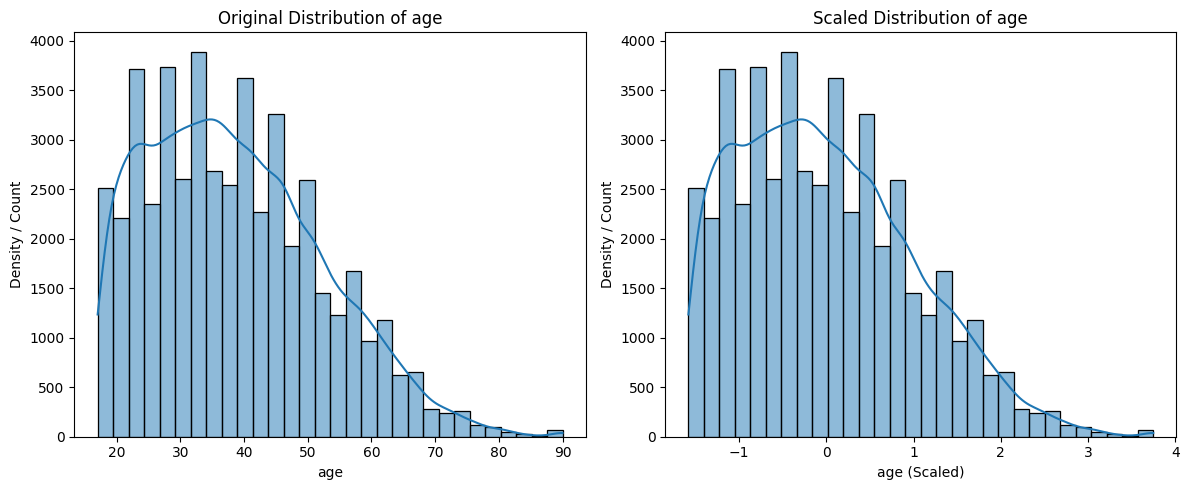

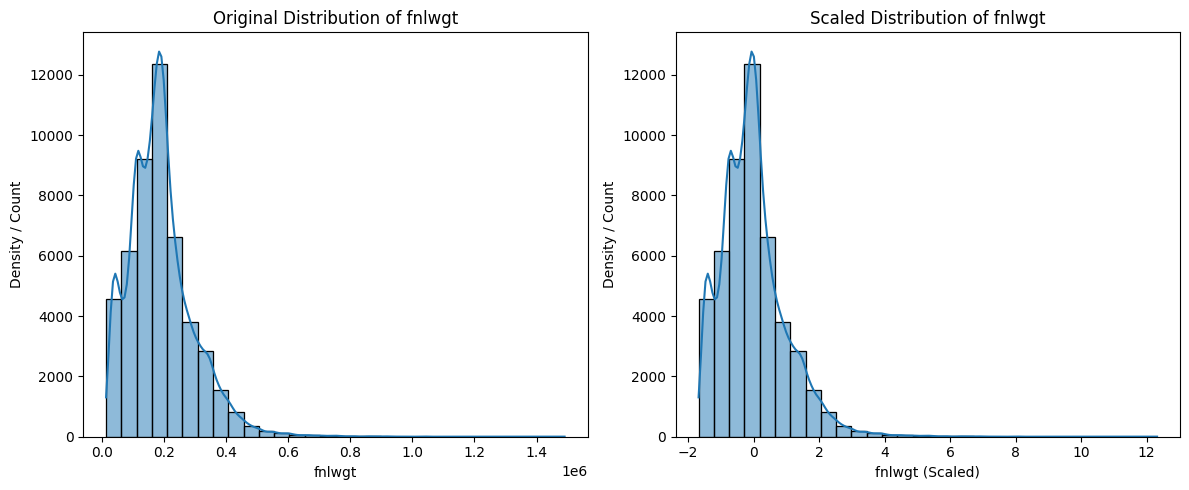

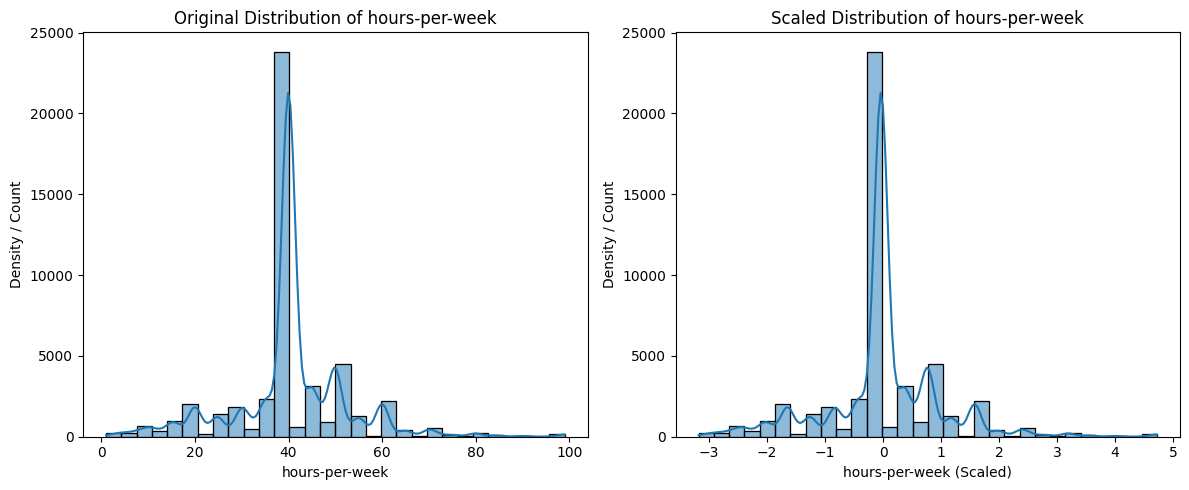

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_numerical_features = ['age', 'fnlwgt', 'hours-per-week']

for feature in selected_numerical_features:
    plt.figure(figsize=(12, 5))

    # Plot original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Original Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density / Count')

    # Plot scaled distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df_encoded[feature], kde=True, bins=30)
    plt.title(f'Scaled Distribution of {feature}')
    plt.xlabel(f'{feature} (Scaled)')
    plt.ylabel('Density / Count')

    plt.tight_layout()
    plt.show()


## Save Processed Dataset



In [9]:
df_encoded.to_csv('adult_income_preprocessed.csv', index=False)
print("Processed dataset saved to 'adult_income_preprocessed.csv'")

Processed dataset saved to 'adult_income_preprocessed.csv'


## Summary:
The general impact of scaling on various machine learning algorithms:

Feature scaling is crucial for many machine learning algorithms because it ensures that all features contribute equally to the model's learning process, preventing features with larger numerical ranges from dominating.
*   **Algorithms highly sensitive to feature scales**:
    *   **Distance-based algorithms** (e.g., K-Nearest Neighbors, Support Vector Machines): These algorithms rely on distance calculations. Without scaling, features with larger ranges would disproportionately influence distance metrics, leading to biased results.
    *   **Gradient Descent-based algorithms** (e.g., Linear Regression, Logistic Regression, Neural Networks): Scaling helps these algorithms converge faster and more stably by preventing large gradients from leading to oscillations or slow convergence.
    *   **Principal Component Analysis (PCA)**: PCA aims to find directions of maximum variance. Unscaled features with large variances would heavily influence the principal components, potentially misrepresenting the data's true structure.
*   **Algorithms less sensitive to feature scales**:
    *   **Tree-based algorithms** (e.g., Decision Trees, Random Forests, Gradient Boosting Machines): These algorithms make decisions based on thresholds of individual features and are generally invariant to the scale of the features.
Overall, scaling improves model performance, stability, and interpretability for a wide range of machine learning techniques by creating a consistent feature space.
